In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

   # Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine('sqlite:///hawaii.sqlite')

In [5]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(engine, reflect=True)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
station = Base.classes.station
measurement = Base.classes.measurement

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [9]:
# Finding column names of both tables
station_first_row = session.query(station).first()
station_first_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x289d2ac5190>,
 'name': 'WAIKIKI 717.2, HI US',
 'id': 1,
 'latitude': 21.2716,
 'elevation': 3.0,
 'station': 'USC00519397',
 'longitude': -157.8168}

In [10]:
# Finding column names of both tables
measurement_first_row = session.query(measurement).first()
measurement_first_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x289cf467640>,
 'station': 'USC00519397',
 'prcp': 0.08,
 'date': '2010-01-01',
 'id': 1,
 'tobs': 65.0}

In [11]:
# Find the most recent date in the data set.
data = engine.execute("SELECT MAX(date) FROM measurement")
for record in data:
    print(record)

('2017-08-23',)


In [12]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
# Starting from the most recent data point in the database.
# Calculate the date one year from the last date in data set
# Perform a query to retrieve the data and precipitation
# Save the query results as a Pandas DataFrame and set the index to the date column
data = pd.read_sql("SELECT date, prcp FROM measurement WHERE date >= DATE('2017-08-23', '-12 month')", engine)
data

,id,station,date,prcp,tobs
0,2364,USC00519397,2016-08-23,0.00,81.0
1,2365,USC00519397,2016-08-24,0.08,79.0
2,2366,USC00519397,2016-08-25,0.08,80.0
3,2367,USC00519397,2016-08-26,0.00,79.0
4,2368,USC00519397,2016-08-27,0.00,77.0
...,...,...,...,...,...
2225,19546,USC00516128,2017-08-19,0.09,71.0
2226,19547,USC00516128,2017-08-20,NaN,78.0
2227,19548,USC00516128,2017-08-21,0.56,76.0
2228,19549,USC00516128,2017-08-22,0.50,76.0


In [13]:
# Sort the dataframe by date
data['date'] = pd.to_datetime(data['date'])
df_sort = data.sort_values('date')
df_sort

,id,station,date,prcp,tobs
0,2364,USC00519397,2016-08-23,0.00,81.0
1009,8825,USC00517948,2016-08-23,NaN,80.0
1529,14608,USC00519281,2016-08-23,1.79,77.0
704,7331,USC00514830,2016-08-23,0.05,80.0
361,5091,USC00513117,2016-08-23,0.15,76.0
...,...,...,...,...,...
1527,12186,USC00519523,2017-08-22,0.00,82.0
1008,7635,USC00514830,2017-08-23,0.00,82.0
360,2724,USC00519397,2017-08-23,0.00,81.0
1528,12187,USC00519523,2017-08-23,0.08,82.0


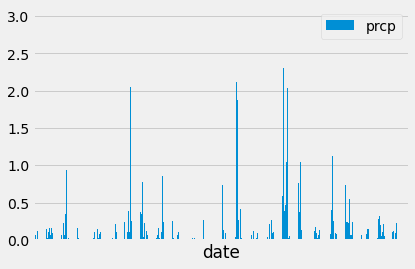

In [21]:
# Use Pandas Plotting with Matplotlib to plot the data
df_sort.plot(x='date', y='prcp', kind = 'bar', xticks = []);

In [15]:
# Use Pandas to calcualte the summary statistics for the precipitation data
df_sort.describe()["prcp"]

count    2021.000000
mean        0.177279
std         0.461190
min         0.000000
25%         0.000000
50%         0.020000
75%         0.130000
max         6.700000
Name: prcp, dtype: float64

# Exploratory Station Analysis

In [16]:
# Design a query to calculate the total number stations in the dataset
data_station = engine.execute("SELECT COUNT(DISTINCT station) FROM measurement")
for record in data_station:
    print(record)

(9,)


In [17]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
data_station = pd.read_sql("SELECT station, COUNT(*) AS count FROM measurement GROUP BY station", engine)
    
# List the stations and the counts in descending order.
data_station.sort_values('count', ascending = False)

,station,count
6,USC00519281,2772
7,USC00519397,2724
1,USC00513117,2709
8,USC00519523,2669
3,USC00516128,2612
2,USC00514830,2202
0,USC00511918,1979
4,USC00517948,1372
5,USC00518838,511


In [18]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
pd.read_sql("SELECT MIN(tobs) AS Lowest, MAX(tobs) AS Highest, AVG(tobs) AS Average\
            FROM measurement WHERE station = 'USC00519281'", engine)

,Lowest,Highest,Average
0,54.0,85.0,71.663781


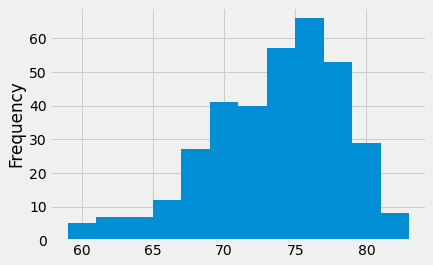

In [20]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station
data = pd.read_sql("SELECT * FROM measurement\
                   WHERE date >= DATE('2017-08-23', '-12 month')\
                   AND station = 'USC00519281'", engine)
data['date'] = pd.to_datetime(data['date'])
df_sort = data.sort_values('date')

# And plot the results as a histogram
df_sort['tobs'].plot(kind = 'hist', bins = 12);

# Close session

In [ ]:
# Close Session
session.close()